In [1]:
import tensorflow as tf
import numpy as np

In [26]:
# linear
x_data = np.random.randn(2000,3)
w_real = [0.3,0.49,0.1]
b_real = -0.21

noise = np.random.randn(1,2000)*0.11
y_data = np.matmul(w_real, x_data.T) + b_real + noise

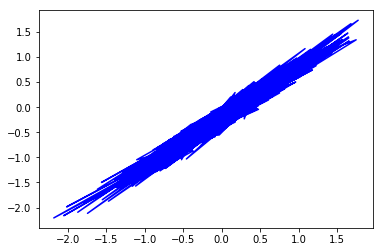

In [33]:
from pylab import *
plot(np.matmul(w_real, x_data.T) , y_data[0],'b')
show()

In [60]:
num_steps = 10
g = tf.Graph()
wb_ = []
Loss = 0
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        loss = tf.reduce_mean(tf.square(y_pred-y_true))
    
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    #init and "run"
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(num_steps):
            sess.run(train, {x:x_data, y_true:y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
        print(num_steps,sess.run([w,b]))

0 [array([[0.28048062, 0.5124079 , 0.10912402]], dtype=float32), -0.2086019]
5 [array([[0.30132067, 0.49051246, 0.09815262]], dtype=float32), -0.21078128]
10 [array([[0.30132064, 0.4905125 , 0.09815262]], dtype=float32), -0.21078128]


In [67]:
# logs regr
N = 20000
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x_data = np.random.randn(N,3)
w_real = [0.3,0.49,0.1]
b_real = -0.21
wxb = np.matmul(w_real, x_data.T) + b_real

In [68]:
y_data_pre_noise = sigmoid(wxb)
y_data = np.random.binomial(1,y_data_pre_noise)

In [70]:
num_steps = 100
g = tf.Graph()
wb_ = []
Loss = 0
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None,3])
    y_true = tf.placeholder(tf.float32, shape=None)
    
    with tf.name_scope('inference') as scope:
        w = tf.Variable([[0,0,0]], dtype=tf.float32, name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias')
        y_pred = tf.matmul(w,tf.transpose(x)) + b
    
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss)
    
    with tf.name_scope('train') as scope:
        learning_rate = 0.5
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train = optimizer.minimize(loss)
        
    #init and "run"
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(num_steps):
            sess.run(train, {x:x_data, y_true:y_data})
            if (step % 5 == 0):
                print(step, sess.run([w,b]))
                wb_.append(sess.run([w,b]))
        print(num_steps,sess.run([w,b]))

0 [array([[0.03413917, 0.0567521 , 0.01075626]], dtype=float32), -0.023699999]
5 [array([[0.15152235, 0.25187457, 0.0477285 ]], dtype=float32), -0.1035322]
10 [array([[0.21460794, 0.35671923, 0.06764633]], dtype=float32), -0.14483438]
15 [array([[0.24998927, 0.41550425, 0.07888368]], dtype=float32), -0.1671565]
20 [array([[0.27040014, 0.44940558, 0.08541485]], dtype=float32), -0.17959338]
25 [array([[0.2823747 , 0.46928838, 0.08927604]], dtype=float32), -0.18665856]
30 [array([[0.2894697 , 0.48106557, 0.09158047]], dtype=float32), -0.19072257]
35 [array([[0.29369798, 0.4880824 , 0.09296284]], dtype=float32), -0.19307968]
40 [array([[0.2962264 , 0.49227738, 0.09379427]], dtype=float32), -0.19445458]
45 [array([[0.2977414 , 0.49479035, 0.09429495]], dtype=float32), -0.19525985]
50 [array([[0.29865018, 0.49629748, 0.09459658]], dtype=float32), -0.19573298]
55 [array([[0.29919565, 0.497202  , 0.09477829]], dtype=float32), -0.1960116]
60 [array([[0.29952317, 0.49774507, 0.09488774]], dtype=